In [4]:
# --- Setup and Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# --- 4.1 Load Data ---
print("1. Loading Data...")
try:
    # IMPORTANT: Ensure your CSV has columns like 'Rainfall_mm', 'Temperature_C', 'Fertilizer_kg', 'Region', 'Crop_Yield_t_ha'
    data = pd.read_csv('crop_data.csv') 
    print(f"Data loaded successfully. Shape: {data.shape}")
    print("\nInitial Data Info:")
    data.info()
except FileNotFoundError:
    print("ERROR: 'crop_data.csv' not found. Please ensure it is in the same directory.")
    # Exit or use synthetic data if necessary
    # (If you used the synthetic data from the previous response, skip this try/except)

# --- 4.2 Data Cleaning and Preprocessing ---
print("\n2. Data Cleaning and Preprocessing...")

# Handle missing values by dropping rows (simple approach for prototype)
# Since your data had 0 missing values, this line just creates a copy
data_cleaned = data.dropna()
print(f"Rows dropped due to missing values: {len(data) - len(data_cleaned)}")

# Identify categorical columns for One-Hot Encoding
# Based on your data info: 'Region', 'Soil_Type', 'Crop', 'Weather_Condition'
# 'Fertilizer_Used' and 'Irrigation_Used' are 'bool' and will be treated as 0s/1s automatically.
categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']

# Perform One-Hot Encoding on categorical features
data_processed = pd.get_dummies(data_cleaned, columns=categorical_cols, drop_first=True)

# Define Features (X) and Target (y)
# Adjust the target column name if yours is different
# --- FIX IS HERE ---
TARGET_COLUMN = 'Yield_tons_per_hectare' 
# --------------------

X = data_processed.drop(TARGET_COLUMN, axis=1)
y = data_processed[TARGET_COLUMN]

print(f"Features (X) shape: {X.shape}, Target (y) shape: {y.shape}")
print("\nFinal Features List:")
print(X.columns.tolist())

1. Loading Data...
Data loaded successfully. Shape: (1000000, 10)

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB

2. Data Cleaning and Preprocessing...
Rows dropped due to missing val

In [5]:
# --- 5.1 Splitting Data ---
print("\n3. Splitting Data...")
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


# --- 5.2 Training the Model ---
print("\n4. Training the Random Forest Regressor...")
# Initialize the model (using 100 trees)
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model to the training data
model.fit(X_train, y_train)


# --- 5.3 Prediction and Evaluation ---
print("\n5. Prediction and Evaluation...")
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Results:")
print(f"   Mean Absolute Error (MAE): {mae:.3f} t/ha")
print(f"   R-squared (R² Score): {r2:.3f} (Closer to 1.0 is better)")


3. Splitting Data...
Training set size: 800000 samples
Testing set size: 200000 samples

4. Training the Random Forest Regressor...

5. Prediction and Evaluation...
Model Results:
   Mean Absolute Error (MAE): 0.412 t/ha
   R-squared (R² Score): 0.907 (Closer to 1.0 is better)



6. Feature Importance Analysis...
Top 5 Factors Influencing Crop Yield:
Rainfall_mm            0.607261
Fertilizer_Used        0.195797
Irrigation_Used        0.124829
Temperature_Celsius    0.029242
Days_to_Harvest        0.016918
dtype: float64


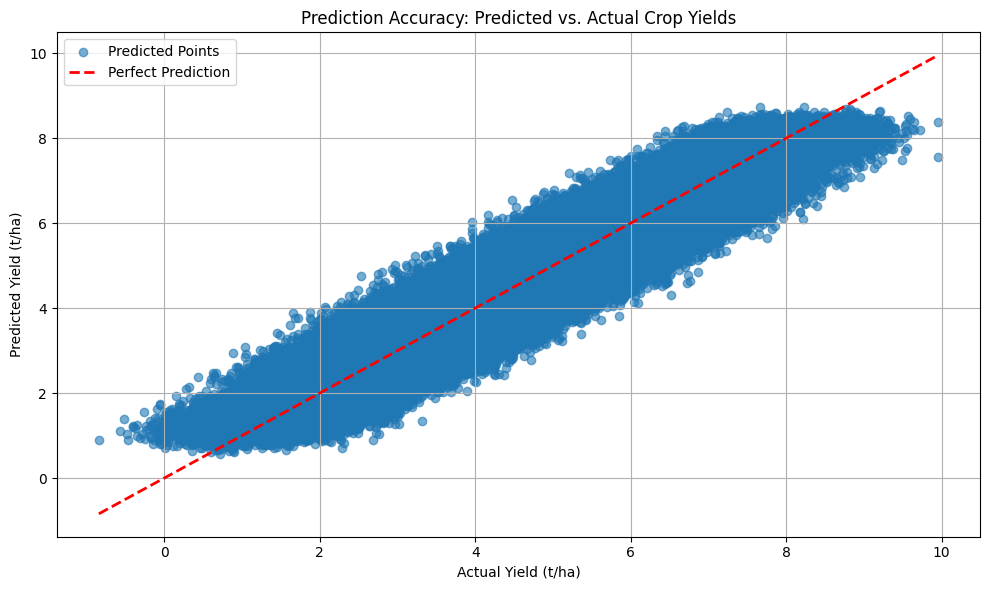

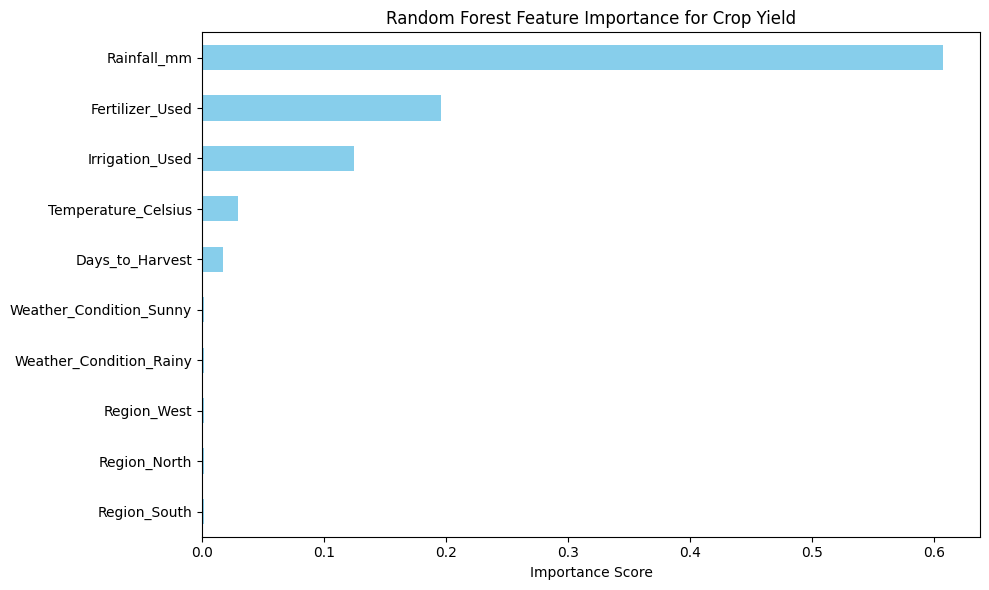

In [6]:
# --- 6.1 Feature Importance ---
print("\n6. Feature Importance Analysis...")
# Get feature importance from the trained model
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
# Sort in descending order
feature_importances = feature_importances.sort_values(ascending=False)

print("Top 5 Factors Influencing Crop Yield:")
print(feature_importances.head())

# --- 6.2 Plotting ---

# Plot 1: Predicted vs. Actual Yields
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted Points')
# Draw a perfect prediction line (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Prediction Accuracy: Predicted vs. Actual Crop Yields')
plt.xlabel('Actual Yield (t/ha)')
plt.ylabel('Predicted Yield (t/ha)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Feature Importance
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='barh', color='skyblue') # Show top 10
plt.title('Random Forest Feature Importance for Crop Yield')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis() # Put the most important feature on top
plt.tight_layout()
plt.show()